# Analytical and Symbolic Computations 

This notebook should be run in the Python kernel as parts employs sympy. 

## Import Package 

In [1]:
import numpy as np
import sympy as sym
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols, pi
from sympy.abc import t
u = Function('u')

To do:
1. replace notion $S_1$ for $A$ and $C_1$ for $B$; 
2. extend computation to third harmonic; 
3. implementation of periodic boundary conditions in OpenFoam; 

## Section 1: Introduction 

Can the function [pde_separate](https://docs.sympy.org/latest/modules/solvers/pde.html) be used to illustate computations further? 

## Section 2: Analytical Computations

### Useful Formulas 

We will use that 

$A \cos(\omega \, t) + B \sin(\omega \, t) = C \sin(\omega \, t + \phi)$ 

where $C = \pm \sqrt{A^2+B^2}$ and $\phi = -A/B$. 

#### Single Harmonic Component

We will also use that  

$\sin^3(\theta) = \frac{3}{4} \, \sin(\theta) - \frac{1}{4} \, \sin(3 \, \theta)$ and 

$\cos^3(\theta) = \frac{3}{4} \, \cos(\theta) + \frac{1}{4} \, \cos(3 \, \theta) $

$ [ A \, \cos(\theta) + B \, \sin(\theta) ]^3 = A^3 \, \cos^3(\theta) + B^3 \, \sin^3(\theta) 
+ 3 \, A^2 \, B \, \cos^2(\theta) \sin(\theta) + 3 \, A \, B^2 \, \cos(\theta) \sin
^2(\theta) $ 

$ [ A \, \cos(\theta) + B \, \sin(\theta) ]^3 = A^3 \, \cos^3(\theta) + B^3 \, \sin^3(\theta) 
+ 3 \, A^2 \, B \, [1 - \sin^2(\theta)] \, \sin(\theta)  + 3 \, A \, B^2 \, \cos(\theta) \, [1 - \cos^2(\theta)] $

$ [ A \, \cos(\theta) + B \, \sin(\theta) ]^3 = A^3 \, \cos^3(\theta) + B^3 \, \sin^3(\theta) 
+ 3 \, A^2 \, B \, [\sin(\theta) - \sin^3(\theta)]  + 3 \, A \, B^2 \, [ \cos(\theta) - \cos^3(\theta)] $

$ [ A \, \cos(\theta) + B \, \sin(\theta) ]^3 = [ A^3 - 3 \, A \, B^2 ] \, \cos^3(\theta) 
+ [ B^3 - 3 \, A^2 \, B ] \, \sin^3(\theta) + 3 \, A^2 \, B \, \sin(\theta)  + 3 \, A \, B^2 \, \cos(\theta) $

$ [ A \, \cos(\theta) + B \, \sin(\theta) ]^3 = 
[ A^3 - 3 \, A \, B^2 ] \, \left[  \frac{3}{4} \, \cos(\theta) + \frac{1}{4} \, \cos(3 \, \theta) \right] 
+ [ B^3 - 3 \, A^2 \, B ] \, \left[ \frac{3}{4} \, \sin(\theta) - \frac{1}{4} \, \sin(3 \, \theta) \right]   
+ 3 \, A^2 \, B \, \sin(\theta)  + 3 \, A \, B^2 \, \cos(\theta) $

Terms in $\cos(\theta)$: 
$ \frac{3}{4} \, [ A^3 - 3 \, A \, B^2 ] \cos(\theta) + 3 \, A \, B^2 \, \cos(\theta) = 
[ \frac{3}{4} \, A^3 + \frac{3}{4} \, A \, B^2 ] \cos(\theta) $

Terms in $\sin(\theta)$:
$ \frac{3}{4} \, [ B^3 - 3 \, A^2 \, B ] \sin(\theta) + 3 \, A^2 \, B \, \sin(\theta) = 
[ \frac{3}{4} \, B^3 + \frac{3}{4} \, A^2 \, B ] \sin(\theta) $

$ [A + B + C]^3 = 
   A^3 + B^3 + C^3 + 3 \, A^2 \, B + 3 \, A^2 \, C + 3 \, A \, B^2 + 3 \, B^2 \, C 
   + 3 \, A \, C^2 + 3 \, B \, C^2 + 6 \, A \, B \, C$ 
   
#### Two Harmonic Components 

Howe does HarmonicBalance.jl manage the computation that follows?  

$ [A_0 + A_1 \, \cos(\theta) + B_1 \, \sin(\theta) + A_3 \, \cos(3 \theta) + B_3 \, \sin(\theta)]^3 = $
(a number of terms goes here)

Terms in constant: 

Terms in $\cos(\theta)$:

Terms in $\sin(\theta)$:

Terms in $\cos(3 \theta)$:

Terms in $\sin(3 \theta)$:

#### First Harmonic Component Supported Symbolic  

In [2]:
x, A, B = symbols("x A B")

expr1 = sym.expand((A*sym.cos(x)+B*sym.sin(x))**3)
# expr2 = expr1.subs[(sym.cos(x)**3,0.75*sym.cos(x)+0.25*sym.cos(3*x)),(sym.sin(x)**3,0.75*sym.sin(x)-0.25*sym.sin(3*x))]
expr2 = expr1.subs([(sym.cos(x)**3,0.75*sym.cos(x)+0.25*sym.cos(3*x)),(sym.sin(x)**3,0.75*sym.sin(x)-0.25*sym.sin(3*x))])
# expr3 = expr2.subs([(sym.cos(x)**2,1-sym.sin(x)**2),(sym.sin(x)**2,1-sym.cos(x)**2)])
expr3 = expr2.subs([(sym.sin(x)*sym.cos(x)**2,sym.sin(x)-sym.sin(x)**3),(sym.cos(x)*sym.sin(x)**2,sym.cos(x)-sym.cos(x)**3)])
expr4 = expr3.subs([(sym.sin(3*x),0),(sym.cos(3*x),0)])
print(expr1)
print(expr2) 
print(expr3)
print(expr4)

A**3*cos(x)**3 + 3*A**2*B*sin(x)*cos(x)**2 + 3*A*B**2*sin(x)**2*cos(x) + B**3*sin(x)**3
A**3*(0.75*cos(x) + 0.25*cos(3*x)) + 3*A**2*B*sin(x)*cos(x)**2 + 3*A*B**2*sin(x)**2*cos(x) + B**3*(0.75*sin(x) - 0.25*sin(3*x))
A**3*(0.75*cos(x) + 0.25*cos(3*x)) + 3*A**2*B*(-sin(x)**3 + sin(x)) + 3*A*B**2*(-cos(x)**3 + cos(x)) + B**3*(0.75*sin(x) - 0.25*sin(3*x))
0.75*A**3*cos(x) + 3*A**2*B*(-sin(x)**3 + sin(x)) + 3*A*B**2*(-cos(x)**3 + cos(x)) + 0.75*B**3*sin(x)


#### First and Third Harmonic Component Using Fourier Series  

Expands

$$ f(t) = [ A \cos(2\pi f_d t) + B \sin(2\pi f_d t) ]^3 \text{ for }  0 \leq t \leq 1/f_d $$

in a Fourier series. 

In [3]:
import sympy as sym
from sympy import fourier_series, symbols, cos, sin, pi
t, A, B = symbols("t A B")
fd, omd = symbols("fd omd", positive=True)
f = sym.expand((A*cos(2*pi*fd*t)+B*sin(2*pi*fd*t))**3)
s = fourier_series(f, (t, 0, 1/fd))
s1 = s.truncate(n=1)
print(sym.simplify(s1))
s2 = s.truncate(n=2)
print(sym.simplify(s2))

3*(A**2 + B**2)*(A*cos(2*pi*fd*t) + B*sin(2*pi*fd*t))/4
A*(A**2 - 3*B**2)*cos(6*pi*fd*t)/4 + 3*A*(A**2 + B**2)*cos(2*pi*fd*t)/4 + 3*B*(A**2 + B**2)*sin(2*pi*fd*t)/4 + B*(3*A**2 - B**2)*sin(6*pi*fd*t)/4


Expands

$$ f(t) = [ - \omega_d A \sin(2\pi f_d t) + \omega_d B \cos(2\pi f_d t) ]^3 \text{ for }  0 \leq t \leq 1/f_d $$

in a Fourier series.

In [4]:
import sympy as sym
from sympy import fourier_series, symbols, cos, sin, pi
t, A, B = symbols("t A B")
fd, omd = symbols("fd omd", positive=True)
f = sym.expand((-omd*A*sin(2*pi*fd*t)+omd*B*cos(2*pi*fd*t))**3)
s = fourier_series(f, (t, 0, 1/fd))
s1 = s.truncate(n=1)
print(sym.simplify(s1))
s2 = s.truncate(n=2)
print(sym.simplify(s2))

3*omd**3*(A**2 + B**2)*(-A*sin(2*pi*fd*t) + B*cos(2*pi*fd*t))/4
omd**3*(A*(A**2 - 3*B**2)*sin(6*pi*fd*t) - 3*A*(A**2 + B**2)*sin(2*pi*fd*t) + 3*B*(A**2 + B**2)*cos(2*pi*fd*t) - B*(3*A**2 - B**2)*cos(6*pi*fd*t))/4


Expands

$$ f(t) = [ C + A \cos(2\pi f_d t) + B \sin(2\pi f_d t) ]^3 \text{ for }  0 \leq t \leq 1/f_d $$

in a Fourier series. 

In [5]:
import sympy as sym
from sympy import fourier_series, symbols, cos, sin, pi
t, A, B, C = symbols("t A B C")
fd, omd = symbols("fd omd", positive=True)
f = sym.expand((C+A*cos(2*pi*fd*t)+B*sin(2*pi*fd*t))**3)
s = fourier_series(f, (t, 0, 1/fd))
s1 = s.truncate(n=1)
print(sym.simplify(s1))
s2 = s.truncate(n=2)
print(sym.simplify(s2))

C*(3*A**2 + 3*B**2 + 2*C**2)/2
3*A**2*C/2 + 3*A*(A**2 + B**2 + 4*C**2)*cos(2*pi*fd*t)/4 + 3*B**2*C/2 + 3*B*(A**2 + B**2 + 4*C**2)*sin(2*pi*fd*t)/4 + C**3


## Section 3: Wave Equation - Solve 1D Helmholtz Equation Symbolically 

### Section 1.3: Undamped Case: Solving the sinus mode amplitude B(x) only   

Q1: How to implement periodic bc? 

In [6]:
from sympy import Function, dsolve, Derivative, diff, integrate, sin, cos, symbols, pi, plot
from sympy.abc import x

B = symbols("B", cls=Function)
x = symbols("x")
k = symbols("k", positive=True)

# Solve the ODE
eqns  = Derivative(B(x), x, x) + k*k*B(x)-sin(3*pi*x)
ics0  = {B(x).subs(x,0): B(x).subs(x,1), B(x).diff(x).subs(x,0): B(x).diff(x).subs(x,1)}
ics0  = {B(0): 0, B(1): 0}
sol   = dsolve(eqns,ics = ics0)
sol

Eq(B(x), sin(3*pi*x)/(k**2 - 9*pi**2))

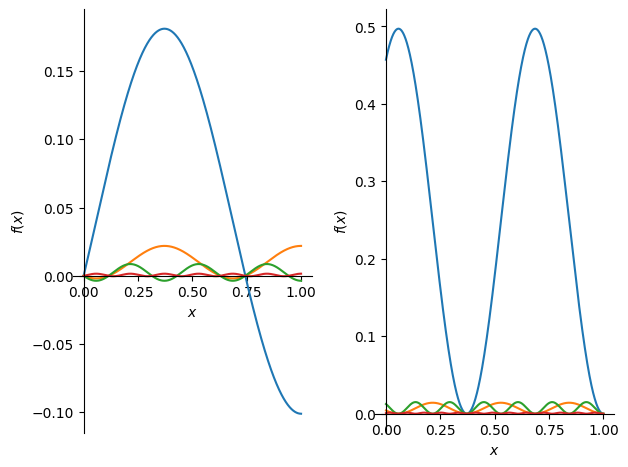

In [13]:
from sympy import Function, dsolve, Derivative, diff, integrate, plot
from sympy.plotting import plot, PlotGrid
from sympy.abc import x

B = symbols("B", cls=Function)
x = symbols("x")
k = symbols("k", positive=True)

# Solve the ODE
eqns  = Derivative(B(x), x, x) + k*k*B(x)-1
# ics0  = {B(x).subs(x,0): B(x).subs(x,1), B(x).diff(x).subs(x,1): 0}
ics0  = {B(x).subs(x,0): 0, B(x).diff(x).subs(x,1): 0}
sol   = dsolve(eqns,ics = ics0)
dxsol = diff(sol.rhs,x)

plota = plot(show=False)
plotb = plot(show=False)

for ki in sym.Array([5.,10.,20.,40.]):
    plota1 = plot(sol.rhs.subs(k,ki), (x, 0, 1), show=False)
    plota.append(plota1[0])
    plotb1 = plot(pow(dxsol.subs(k,ki),2), (x, 0, 1), show=False)
    plotb.append(plotb1[0])

PlotGrid(1, 2, plota, plotb)

In [40]:
from sympy import diff, integrate
dxsol = diff(sol.rhs,x)
myans = integrate(pow(dxsol,2),(x,0,1)) 
myans.subs(k,40).evalf()

0.00184157220098541

### Section 2.3: Damped Case: Solving both the cosinus mode amplitude A(x) and sinus mode amplitude B(x)   

The amplitude of the cosinus mode amplitude $A(x)$ increasing with damping as expected. 

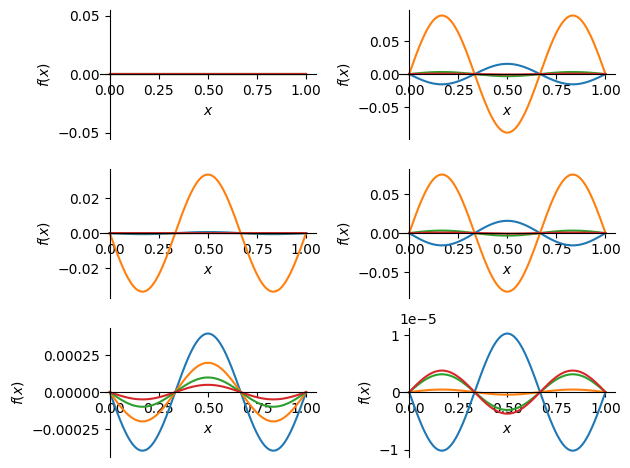

In [18]:
from sympy import Function, dsolve, Derivative, Eq, sin, cos, symbols, pi
from sympy.plotting import plot, PlotGrid
from sympy.abc import x

A = symbols("A", cls=Function)
B = symbols("B", cls=Function)
x = symbols("x")
k = symbols("k", positive=True)
ga = symbols("ga", positive=True)

# Solve the ODE ()
eq1 = Eq(Derivative(A(x), x, x) + k*k*A(x)+ga*k*B(x),0)
#eq2 = Eq(Derivative(B(x), x, x) + k*k*B(x)-ga*k*A(x),1) 
eq2 = Eq(Derivative(B(x), x, x) + k*k*B(x)-ga*k*A(x), sin(3*pi*x))
eqns = (eq1, eq2) 
ics0 = {A(0): 0, A(1): 0, B(0): 0, B(1): 0}

sol = dsolve(eqns,ics = ics0)

plota1 = plot(show=False)
plotb1 = plot(show=False)
plota2 = plot(show=False)
plotb2 = plot(show=False)
plota3 = plot(show=False)
plotb3 = plot(show=False)

for ki in sym.Array([5.,10.,20.,40.]):
    plota11 = plot(sol[0].rhs.subs({k:ki, ga:0}), (x, 0, 1), show=False)
    plotb11 = plot(sol[1].rhs.subs({k:ki, ga:0}), (x, 0, 1), show=False)
    plota1.append(plota11[0])
    plotb1.append(plotb11[0])

for ki in sym.Array([5.,10.,20.,40.]):
    plota11 = plot(sol[0].rhs.subs({k:ki, ga:.5}), (x, 0, 1), show=False)
    plotb11 = plot(sol[1].rhs.subs({k:ki, ga:.5}), (x, 0, 1), show=False)
    plota2.append(plota11[0])
    plotb2.append(plotb11[0])

for ki in sym.Array([5.,10.,20.,40.]):
    plota11 = plot(sol[0].rhs.subs({k:ki, ga:500}), (x, 0, 1), show=False)
    plotb11 = plot(sol[1].rhs.subs({k:ki, ga:500}), (x, 0, 1), show=False)
    plota3.append(plota11[0])
    plotb3.append(plotb11[0])

PlotGrid(3, 2, plota1, plotb1, plota2, plotb2, plota3, plotb3)

In [19]:
sol[0].rhs

-((I*ga - k)*(I*ga**2*k + ga*(2*k**2 - 9*pi**2) - I*k**3 + 9*I*pi**2*k) + (I*ga + k)*(I*ga**2*k - ga*(2*k**2 - 9*pi**2) - I*k**3 + 9*I*pi**2*k))*sin(3*pi*x)/(2*(I*ga**2*k - ga*(2*k**2 - 9*pi**2) - I*k**3 + 9*I*pi**2*k)*(I*ga**2*k + ga*(2*k**2 - 9*pi**2) - I*k**3 + 9*I*pi**2*k))

In [20]:
sol[1].rhs

-(k**2 - 9*pi**2)*sin(3*pi*x)/((I*ga*k - k**2 + 9*pi**2)*(I*ga*k + k**2 - 9*pi**2))

## Section 4: Scalar Transport Equations - Single Harmonic Approximation 

### Section 1.4: Single Harmonic Component - Testing Purposes 

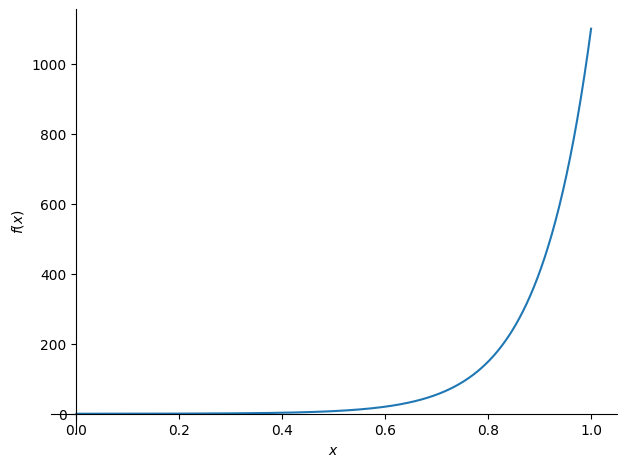

In [37]:
from sympy import Function, dsolve, Derivative, Eq, sin, cos, symbols, pi
from sympy.plotting import plot, PlotGrid
from sympy.abc import x

A = symbols("A", cls=Function)
x = symbols("x")
k = symbols("k", positive=True)
ga = symbols("ga", positive=True)

# Solve the ODE ()
eq1 = Eq(Derivative(A(x), x) - k*A(x), sin(3*pi*x))
# unclear how the boundary condition affects the solution 
ics0 = {A(0): 0
       }

sol = dsolve(eq1,ics = ics0)

plot(sol.rhs.subs({k:10}), (x, 0, 1))

### Section 2.4: Two Harmonic Components - No Damping (Intermediate step) 

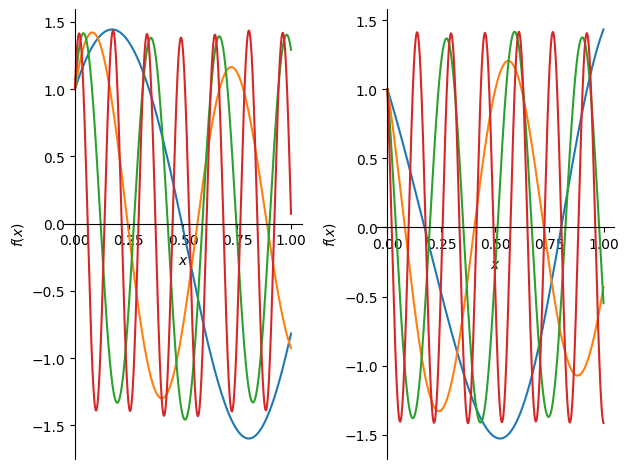

In [45]:
from sympy import Function, dsolve, Derivative, Eq, sin, cos, symbols, pi
from sympy.plotting import plot, PlotGrid
from sympy.abc import x

A = symbols("A", cls=Function)
B = symbols("B", cls=Function)
x = symbols("x")
k = symbols("k", positive=True)

# Solve the ODE ()
eq1 = Eq(Derivative(A(x), x) - k*B(x),0)
eq2 = Eq(Derivative(B(x), x) + k*A(x), sin(3*pi*x))
eqns = (eq1, eq2) 
ics0 = {A(0): 1, B(0): 1}

sol = dsolve(eqns,ics = ics0)

plota1 = plot(show=False)
plotb1 = plot(show=False)

for ki in sym.Array([5.,10.,20.,40.]):
    plota11 = plot(sol[0].rhs.subs({k:ki}), (x, 0, 1), show=False)
    plotb11 = plot(sol[1].rhs.subs({k:ki}), (x, 0, 1), show=False)
    plota1.append(plota11[0])
    plotb1.append(plotb11[0])

PlotGrid(1, 2, plota1, plotb1)

### Section 3.4: Two Harmonic Components - Damping by Coefficient (In Progress)

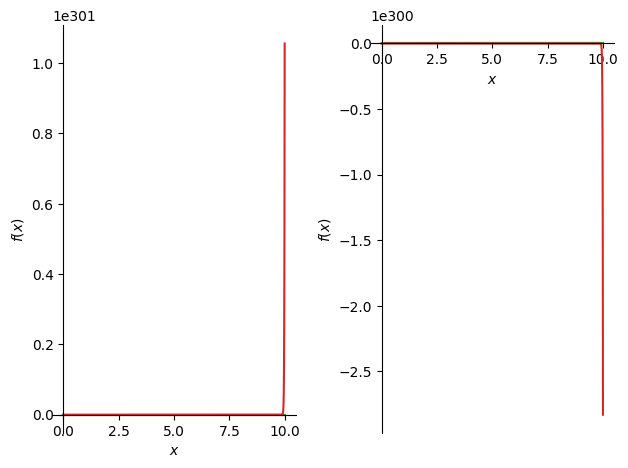

In [13]:
from sympy import Function, dsolve, Derivative, Eq, sin, cos, symbols, pi
from sympy.plotting import plot, PlotGrid
from sympy.abc import x

A = symbols("A", cls=Function)
B = symbols("B", cls=Function)
x = symbols("x")
k = symbols("k", positive=True)
ga = symbols("ga", positive=True)

# Solve the ODE ()
eq1 = Eq(Derivative(A(x), x) - k*B(x)-2*k*A(x),0)
eq2 = Eq(Derivative(B(x), x) + k*A(x)+2*k*B(x), sin(3*pi*x))
eqns = (eq1, eq2) 
ics0 = {A(0): 1, B(0): 1}

sol = dsolve(eqns,ics = ics0)

plota1 = plot(show=False)
plotb1 = plot(show=False)

for ki in sym.Array([5.,10.,20.,40.]):
    plota11 = plot(sol[0].rhs.subs({k:ki}), (x, 0, 10), show=False)
    plotb11 = plot(sol[1].rhs.subs({k:ki}), (x, 0, 10), show=False)
    plota1.append(plota11[0])
    plotb1.append(plotb11[0])

PlotGrid(1, 2, plota1, plotb1)

## Section 5: Sandbox  

Lambda(x, Heaviside(x - 0.65) - Heaviside(x - 0.55) - Heaviside(x - 0.45) + Heaviside(x - 0.35))
Eq(u(x), x**2*(Heaviside(x - 0.65) - Heaviside(x - 0.55) - Heaviside(x - 0.45) + Heaviside(x - 0.35))/2 + x*(-Piecewise((0, 1.53846153846154*Abs(x) < 1), (x*meijerg(((0, 1), ()), ((), (-1, 0)), 1.53846153846154*x), True)) + Piecewise((0, 1.81818181818182*Abs(x) < 1), (x*meijerg(((0, 1), ()), ((), (-1, 0)), 1.81818181818182*x), True)) + Piecewise((0, 2.22222222222222*Abs(x) < 1), (x*meijerg(((0, 1), ()), ((), (-1, 0)), 2.22222222222222*x), True)) - Piecewise((0, 2.85714285714286*Abs(x) < 1), (x*meijerg(((0, 1), ()), ((), (-1, 0)), 2.85714285714286*x), True)) + 0.02) - 0.21125*Heaviside(x - 0.65) + 0.15125*Heaviside(x - 0.55) + 0.10125*Heaviside(x - 0.45) - 0.06125*Heaviside(x - 0.35))


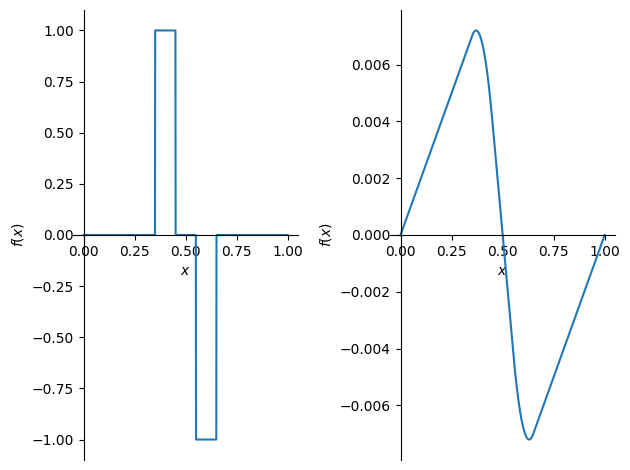

In [15]:
from sympy import Function, dsolve, Derivative, Eq, sin, cos, symbols, pi, Lambda, Heaviside
from sympy.plotting import plot, PlotGrid
from sympy.abc import x

u, src = symbols("u src", cls=Function)
x      = symbols("x")
src    = Lambda(x, (Heaviside(x-0.35) - Heaviside(x-0.45)) - (Heaviside(x-0.55) - Heaviside(x-0.65)))
Iamp   = symbols("Iamp", positive=True)

# Solve the ODE ()
eqn  = Eq(Derivative(u(x), x, x) + src(x),0)
ics0 = {u(0): 0, u(1): 0}

sol = dsolve(eqn,ics = ics0)

print(src)
print(sol)  

plotsrc = plot(src, (x, 0, 1), show=False)
plotu   = plot(sol.rhs, (x, 0, 1), show=False)
PlotGrid(1,2,plotsrc, plotu)